In [168]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [114]:
movie_database = pd.read_csv('tmdb.movies.csv')
movie_database.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [115]:
movie_database.genre_ids = movie_database.genre_ids.apply(lambda x: list(set(ast.literal_eval(x))))
    

In [116]:
x = '[1,2,3,4,4,4,4]'
x = list(set(ast.literal_eval(x)))
x
(x)

[1, 2, 3, 4]

In [117]:
genre_id = {28:"Action",
            12:"Adventure",
            16:"Animation",
            35:"Comedy",
            80:"Crime",
            99:"Documentary",
            18:"Drama",
            10751:"Family",
            14:"Fantasy",
            36:"History",
            27:"Horror",
            10402:"Music",
            9648:"Mystery",
            10749:"Romance",
            878:"Science Fiction",
            10770:"TV Movie",
            53:"Thriller",
            10752:"War",
            37:"Western"}
genre_id

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [118]:
movie_database['genre_ids']

0            [12, 14, 10751]
1        [16, 12, 14, 10751]
2              [12, 28, 878]
3            [16, 35, 10751]
4              [28, 12, 878]
                ...         
26512               [18, 27]
26513               [18, 53]
26514           [28, 12, 14]
26515        [12, 28, 10751]
26516               [27, 53]
Name: genre_ids, Length: 26517, dtype: object

In [119]:
def num_to_genre(genre_id,lis):
    retList = []
    for i in range(len(lis)):
        retList.append(genre_id[lis[i]])
    return retList

In [120]:
x = movie_database.genre_ids
x

0            [12, 14, 10751]
1        [16, 12, 14, 10751]
2              [12, 28, 878]
3            [16, 35, 10751]
4              [28, 12, 878]
                ...         
26512               [18, 27]
26513               [18, 53]
26514           [28, 12, 14]
26515        [12, 28, 10751]
26516               [27, 53]
Name: genre_ids, Length: 26517, dtype: object

In [121]:
x = x.apply(lambda x: num_to_genre(genre_id,x))

In [122]:
movie_database['genre_names'] = x

In [123]:
movie_database['genre_names']

0                   [Adventure, Fantasy, Family]
1        [Animation, Adventure, Fantasy, Family]
2           [Adventure, Action, Science Fiction]
3                    [Animation, Comedy, Family]
4           [Action, Adventure, Science Fiction]
                          ...                   
26512                            [Drama, Horror]
26513                          [Drama, Thriller]
26514               [Action, Adventure, Fantasy]
26515                [Adventure, Action, Family]
26516                         [Horror, Thriller]
Name: genre_names, Length: 26517, dtype: object

In [124]:
movie_database['string_genres'] = movie_database['genre_names'].apply(lambda x: str(x))

In [125]:
movie_database['year'] = pd.to_datetime(movie_database['release_date']).dt.year

In [126]:
movie_database.string_genres


0                     ['Adventure', 'Fantasy', 'Family']
1        ['Animation', 'Adventure', 'Fantasy', 'Family']
2             ['Adventure', 'Action', 'Science Fiction']
3                      ['Animation', 'Comedy', 'Family']
4             ['Action', 'Adventure', 'Science Fiction']
                              ...                       
26512                                ['Drama', 'Horror']
26513                              ['Drama', 'Thriller']
26514                 ['Action', 'Adventure', 'Fantasy']
26515                  ['Adventure', 'Action', 'Family']
26516                             ['Horror', 'Thriller']
Name: string_genres, Length: 26517, dtype: object

In [127]:
movie_database.groupby(['year','string_genres']).count()

Unnamed: 0  genre_ids  id  \
year string_genres                                                 
1930 ['War', 'Drama']                           1          1   1   
1933 ['Horror', 'Thriller']                     1          1   1   
1936 ['Drama', 'Comedy', 'Romance']             1          1   1   
1939 []                                         1          1   1   
1946 ['Drama', 'History', 'Romance']            1          1   1   
...                                           ...        ...  ..   
2019 ['Music', 'Drama', 'Romance']              1          1   1   
     ['Music', 'Drama']                         1          1   1   
     ['Mystery', 'Drama', 'Thriller']           4          4   4   
     ['Romance']                                1          1   1   
2020 ['Crime', 'Horror']                        1          1   1   

                                       original_language  original_title  \
year string_genres                                                         
1930 ['War', 'Drama']                                  1               1   
1933 ['Horror', 'Thriller']                            1               1   
1936 ['Drama', 'Comedy', 'Romance']                    1               1   
1939 []                                                1               1   
1946 ['Drama', 'History', 'Romance']                   1               1   
...                                                  ...             ...   
2019 ['Music', 'Drama', 'Romance']                     1               1   
     ['Music', 'Drama']                                1               1   
     ['Mystery', 'Drama', 'Thriller']                  4               4   
     ['Romance']                                       1               1   
2020 ['Crime', 'Horror']                               1               1   

                                       popularity  release_date  title  \
year string_genres                                                       
1930 ['War', 'Drama']                           1             1      1   
1933 ['Horror', 'Thriller']                     1             1      1   
1936 ['Drama', 'Comedy', 'Romance']             1             1      1   
1939 []                                         1             1      1   
1946 ['Drama', 'History', 'Romance']            1             1      1   
...                                           ...           ...    ...   
2019 ['Music', 'Drama', 'Romance']              1             1      1   
     ['Music', 'Drama']                         1             1      1   
     ['Mystery', 'Drama', 'Thriller']           4             4      4   
     ['Romance']                                1             1      1   
2020 ['Crime', 'Horror']                        1             1      1   

                                       vote_average  vote_count  genre_names  
year string_genres                                                            
1930 ['War', 'Drama']                             1           1            1  
1933 ['Horror', 'Thriller']                       1           1            1  
1936 ['Drama', 'Comedy', 'Romance']               1           1            1  
1939 []                                           1           1            1  
1946 ['Drama', 'History', 'Romance']              1           1            1  
...                                             ...         ...          ...  
2019 ['Music', 'Drama', 'Romance']                1           1            1  
     ['Music', 'Drama']                           1           1            1  
     ['Mystery', 'Drama', 'Thriller']             4           4            4  
     ['Romance']                                  1           1            1  
2020 ['Crime', 'Horror']                          1           1            1  

[3959 rows x 11 columns]

In [128]:
valueList = list(genre_id.values())

length_of_dataframe = len(movie_database.genre_ids)
for x in valueList:
    movie_database[x] = False*length_of_dataframe
movie_database

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0,0,0,0,0,0,0,0,0,0
1,1,"[16, 12, 14, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,0,0,0,0,0,0,0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0,0,0,0,0,0,0,0,0,0
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,0,0,0,0,0,0,0,0,0,0
4,4,"[28, 12, 878]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[18, 27]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,...,0,0,0,0,0,0,0,0,0,0
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,...,0,0,0,0,0,0,0,0,0,0
26514,26514,"[28, 12, 14]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,...,0,0,0,0,0,0,0,0,0,0
26515,26515,"[12, 28, 10751]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [129]:
x = [1,2,3,4,4,4]
x = list(set(x))
x

[1, 2, 3, 4]

In [130]:
for i,x in enumerate(movie_database.genre_names):
    for genre_name in x:
        movie_database[genre_name][i] = 1

<ipython-input-130-04f62e4abd81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_database[genre_name][i] = 1


In [131]:
movie_database

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0,0,0,0,0,0,0,0,0,0
1,1,"[16, 12, 14, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,0,0,0,0,0,0,0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0,0,0,0,0,1,0,0,0,0
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,0,0,0,0,0,0,0,0,0,0
4,4,"[28, 12, 878]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[18, 27]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,...,0,1,0,0,0,0,0,0,0,0
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,...,0,0,0,0,0,0,0,1,0,0
26514,26514,"[28, 12, 14]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,...,0,0,0,0,0,0,0,0,0,0
26515,26515,"[12, 28, 10751]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [132]:
x = movie_database.release_date.apply(lambda x: (x[:4]))

In [133]:
movie_database['release_year'] = x

In [146]:
y = movie_database.groupby(['release_year'])[valueList].sum().T.unstack()


In [147]:
x = movie_database.groupby(['release_year'])[valueList].sum().unstack()
x

         release_year
Action   1930             0
         1933             0
         1936             0
         1939             0
         1946             0
                         ..
Western  2016            21
         2017            44
         2018            27
         2019             1
         2020             0
Length: 1254, dtype: int64

In [148]:
x['Western']

release_year
1930     0
1933     0
1936     0
1939     0
1946     0
        ..
2016    21
2017    44
2018    27
2019     1
2020     0
Length: 66, dtype: int64

In [137]:
x

release_year                 
1930          Action             0
              Adventure          0
              Animation          0
              Comedy             0
              Crime              0
                                ..
2020          Science Fiction    0
              TV Movie           0
              Thriller           0
              War                0
              Western            0
Length: 1254, dtype: int64

In [138]:
movie_database.shape

(26517, 33)

In [145]:
y.to_csv('out.csv')
x.to_csv('out2.csv')

In [170]:
x['Action'][-11:-2]

release_year
2010    282
2011    289
2012    239
2013    292
2014    285
2015    305
2016    315
2017    278
2018    278
dtype: int64

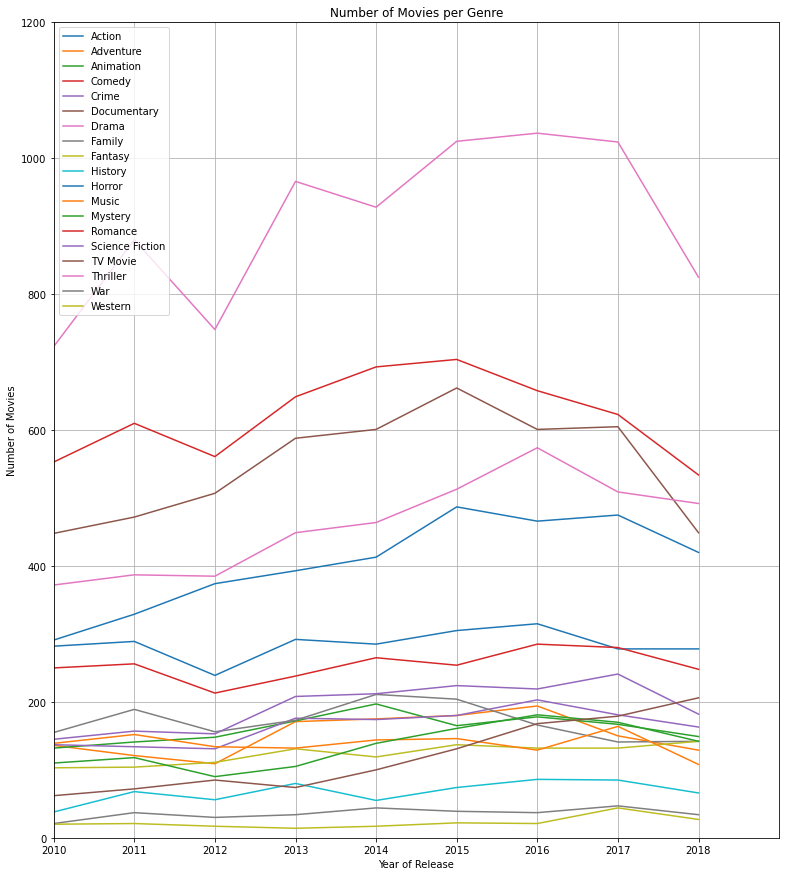

In [269]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots(figsize= (13,15))

ax.set_xlim(0, 9)
ax.set_ylim(0, 1200)
ax.set_title('Number of Movies per Genre')
ax.set_xlabel('Year of Release')
ax.set_ylabel('Number of Movies')

imagebox = OffsetImage(arr_lena, zoom=0.4)

for p in genre_names:
    ax.plot(x[p][-11:-2],label = p)

plt.grid()
plt.draw()
plt.legend(loc="upper left")
plt.savefig('add_picture_matplotlib_figure.png',bbox_inches='tight')
plt.show()

In [237]:
genre_names = list(genre_id.values())
genre_names

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [267]:
x2 = x.to_frame()

In [270]:
numbers_movie_budgets = pd.read_csv('tn.movie_budgets.csv')
numbers_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [271]:
joined_df = pd.merge(movie_database,
                           numbers_movie_budgets,
                            
                           left_on = 'original_title',
                           right_on = 'movie')

In [273]:
joined_df['worldwide_gross'] = joined_df['worldwide_gross'].apply(lambda x: x.replace('$',''))
joined_df['worldwide_gross'] = joined_df['worldwide_gross'].apply(lambda x: x.replace(',',''))
joined_df['worldwide_gross'] = joined_df['worldwide_gross'].apply(lambda x: int(x))

In [274]:
joined_df

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,...,Thriller,War,Western,release_year,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,1,"[16, 12, 14, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,2010,30,"Mar 26, 2010",How to Train Your Dragon,"$165,000,000","$217,581,232",494870992
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0,0,0,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331",621156389
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,0,0,0,1995,37,"Nov 22, 1995",Toy Story,"$30,000,000","$191,796,233",364545516
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,0,0,0,1995,37,"Nov 22, 1995",Toy Story,"$30,000,000","$191,796,233",364545516
4,4,"[28, 12, 878]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,0,0,0,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195",835524642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,26323,[],509316,en,The Box,0.600,2018-03-04,The Box,8.0,1,...,0,0,0,2018,66,"Nov 6, 2009",The Box,"$25,000,000","$15,051,977",34356760
2312,26425,[10402],509306,en,The Box,0.600,2018-03-04,The Box,6.0,1,...,0,0,0,2018,66,"Nov 6, 2009",The Box,"$25,000,000","$15,051,977",34356760
2313,26092,"[16, 35]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,...,0,0,0,2018,68,"May 24, 2002",Enough,"$38,000,000","$39,177,215",50970660
2314,26322,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,...,0,0,0,2018,7,"Aug 26, 2005",Undiscovered,"$9,000,000","$1,069,318",1069318
